# RSNA Intracranial Hemorrhage Detection 

<b>Competition Overview</b><br/><br/>
Intracranial hemorrhage, bleeding that occurs inside the cranium, is a serious health problem requiring rapid and often intensive medical treatment. For example, intracranial hemorrhages account for approximately 10% of strokes in the U.S., where stroke is the fifth-leading cause of death. Identifying the location and type of any hemorrhage present is a critical step in treating the patient.

Diagnosis requires an urgent procedure. When a patient shows acute neurological symptoms such as severe headache or loss of consciousness, highly trained specialists review medical images of the patient’s cranium to look for the presence, location and type of hemorrhage. The process is complicated and often time consuming.

<b>What am i predicting?</b><br/><br/>
In this competition our goal is to predict intracranial hemorrhage and its subtypes. Given an image the we need to predict probablity of each subtype. This indicates its a multilabel classification problem.

<b>Intracranial Hemorrhage</b>

<img src="https://www.technology.org/texorgwp/wp-content/uploads/2019/09/Intracerebral_hemorrhage.jpg"  style="height:30%;width:50%"/>

An intracranial hemorrhage is a type of bleeding that occurs inside the skull. Symptoms include sudden tingling, weakness, numbness, paralysis, severe headache, difficulty with swallowing or vision, loss of balance or coordination, difficulty understanding, speaking , reading, or writing, and a change in level of consciousness or alertness, marked by stupor, lethargy, sleepiness, or coma. Any type of bleeding inside the skull or brain is a medical emergency. It is important to get the person to a hospital emergency room immediately to determine the cause of the bleeding and begin medical treatment.

<b>Types</b>
<br/>
1. Epidural
2. Intraparenchymal    
3. Intraventricular
4. Subarachnoid 
5. Subdural
6. Any

### 1. Epidural

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f9/EpiduralHematoma.jpg" style='width:20%;height:20%'/>

A hematoma is a collection of blood, in a clot or ball, outside of a blood vessel. An epidural hematoma occurs when blood accumulates between your skull and the outermost covering of your brain.

It typically follows a head injury, and usually with a skull fracture. High-pressure bleeding is a prominent feature. If you have an epidural hematoma, you may briefly lose consciousness and then regain consciousness.

Source: https://www.healthline.com/health/extradural-hemorrhage#type

### 2. Intraparenchymal

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Mri041a2.jpg/220px-Mri041a2.jpg" />

Intraparenchymal hemorrhage (IPH) is one form of intracerebral bleeding in which there is bleeding within brain parenchyma. The other form is intraventricular hemorrhage (IVH). Intraparenchymal hemorrhage accounts for approx. 8-13% of all strokes and results from a wide spectrum of disorders.

### 3. Intraventricular

<img src='https://prod-images.static.radiopaedia.org/images/12380293/17abfd31d98cfe599e44fe3053db9e_thumb.jpg' />

Intraventricular hemorrhage (IVH), also known as intraventricular bleeding, is a bleeding into the brain's ventricular system, where the cerebrospinal fluid is produced and circulates through towards the subarachnoid space. It can result from physical trauma or from hemorrhaging in stroke.

### 4. Subarachnoid

<img src="https://www.nejm.org/na101/home/literatum/publisher/mms/journals/content/nejm/2017/nejm_2017.377.issue-3/nejmcp1605827/20180122/images/img_medium/nejmcp1605827_f2.jpeg" style="width:25%;height:25%"/>

Subarachnoid hemorrhage (SAH) is a life-threatening type of stroke caused by bleeding into the space surrounding the brain. SAH can be caused by a ruptured aneurysm, AVM, or head injury. One-third of patients will survive with good recovery; one-third will survive with a disability; and one-third will die. Treatment focuses on stopping the bleeding, restoring normal blood flow, and preventing vasospasm.

### 5. Subdural

<img src="https://cdn.britannica.com/51/193251-050-E254065D/CT-scan-brain-hematoma.jpg" style="width:25%;height:25%"/>

A subdural hemorrhage (or hematoma) is a type of bleeding that often occurs outside the brain as a result of a severe head injury. It takes place when blood vessels burst between the brain and the leather-like membrane that wraps around the brain (the dura mater).

<b>Note</b>
A nice video explaining all the types can be found [here](https://www.youtube.com/watch?v=Kb_wzb7-rvE). 

### Basic EDA

In [1]:
import numpy as np
import pandas as pd
import pydicom
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
input_folder = '../input/rsna-intracranial-hemorrhage-detection/'

In [3]:
path_train_img = input_folder + 'stage_1_train_images/'
path_test_img = input_folder + 'stage_1_test_images/'

### Loading Data

In [4]:
train_df = pd.read_csv(input_folder + 'stage_1_train.csv')
train_df.head()

,ID,Label
0,ID_63eb1e259_epidural,0
1,ID_63eb1e259_intraparenchymal,0
2,ID_63eb1e259_intraventricular,0
3,ID_63eb1e259_subarachnoid,0
4,ID_63eb1e259_subdural,0


In [5]:
# extract subtype
train_df['sub_type'] = train_df['ID'].apply(lambda x: x.split('_')[-1])
# extract filename
train_df['file_name'] = train_df['ID'].apply(lambda x: '_'.join(x.split('_')[:2]) + '.dcm')
train_df.head()

,ID,Label,sub_type,file_name
0,ID_63eb1e259_epidural,0,epidural,ID_63eb1e259.dcm
1,ID_63eb1e259_intraparenchymal,0,intraparenchymal,ID_63eb1e259.dcm
2,ID_63eb1e259_intraventricular,0,intraventricular,ID_63eb1e259.dcm
3,ID_63eb1e259_subarachnoid,0,subarachnoid,ID_63eb1e259.dcm
4,ID_63eb1e259_subdural,0,subdural,ID_63eb1e259.dcm


In [6]:
train_df.shape

(4045572, 4)

In [7]:
print("Number of train images availabe:", len(os.listdir(path_train_img)))

Number of train images availabe: 674258


### Epidural

In [8]:
train_df[train_df['sub_type'] == 'epidural']['Label'].value_counts()

0    671501
1      2761
Name: Label, dtype: int64

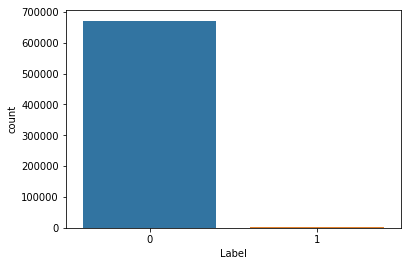

In [9]:
sns.countplot(x='Label', data=train_df[train_df['sub_type'] == 'epidural'])
plt.show()

**Comments**<br/><br/>
For epidural sub type we have 6,71,501 images labeled as 0 and 2,761 labelled as 1.

### Intraparenchymal

In [10]:
train_df[train_df['sub_type'] == 'intraparenchymal']['Label'].value_counts()

0    641698
1     32564
Name: Label, dtype: int64

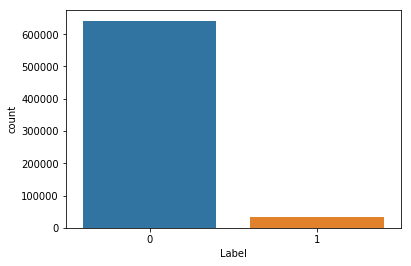

In [11]:
sns.countplot(x='Label', data=train_df[train_df['sub_type'] == 'intraparenchymal'])
plt.show()

**Comments**<br/><br/>
For intraparenchymal sub type we have 6,41,698 images labeled as 0 and 32,564 labelled as 1.

### Intraventricular

In [12]:
train_df[train_df['sub_type'] == 'intraventricular']['Label'].value_counts()

0    650496
1     23766
Name: Label, dtype: int64

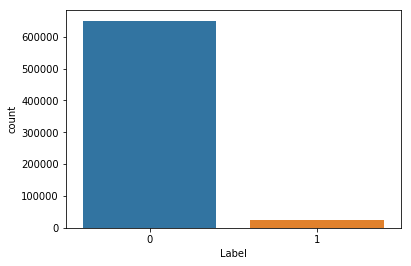

In [13]:
sns.countplot(x='Label', data=train_df[train_df['sub_type'] == 'intraventricular'])
plt.show()

**Comments**<br/><br/>
For intraparenchymal sub type we have 6,50,496 images labeled as 0 and 23,766 labelled as 1.

### Subarachnoid

In [14]:
train_df[train_df['sub_type'] == 'subarachnoid']['Label'].value_counts()

0    642140
1     32122
Name: Label, dtype: int64

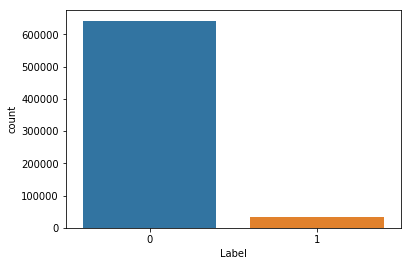

In [15]:
sns.countplot(x='Label', data=train_df[train_df['sub_type'] == 'subarachnoid'])
plt.show()

**Comments**<br/><br/>
For subarachnoid sub type we have 6,42,140 images labeled as 0 and 32,122 labelled as 1.

### Subdural

In [16]:
train_df[train_df['sub_type'] == 'subdural']['Label'].value_counts()

0    631766
1     42496
Name: Label, dtype: int64

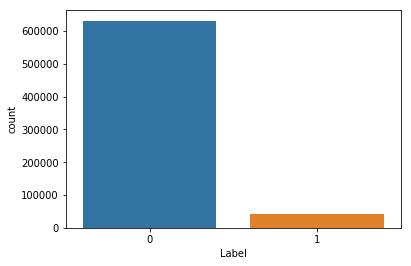

In [17]:
sns.countplot(x='Label', data=train_df[train_df['sub_type'] == 'subdural'])
plt.show()

**Comments**<br/><br/>
For Subdural sub type we have 6,31,766 images labeled as 0 and 42,496 labelled as 1.

### Any

In [18]:
train_df[train_df['sub_type'] == 'any']['Label'].value_counts()

0    577159
1     97103
Name: Label, dtype: int64

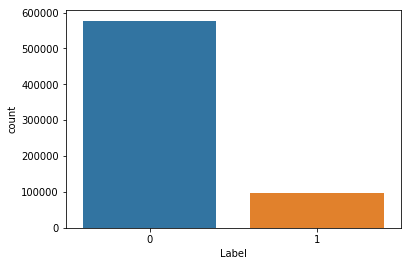

In [19]:
sns.countplot(x='Label', data=train_df[train_df['sub_type'] == 'any'])
plt.show()

**Comments**<br/><br/>
For any sub type we have 5,77,159 images labeled as 0 and 97,103 labelled as 1.

### Final Dataset

In [20]:
train_final_df = pd.pivot_table(train_df.drop(columns='ID'), index="file_name", \
                                columns="sub_type", values="Label")
train_final_df.head()

sub_type,any,epidural,intraparenchymal,intraventricular,subarachnoid,subdural
file_name,,,,,,
ID_000039fa0.dcm,0,0,0,0,0,0
ID_00005679d.dcm,0,0,0,0,0,0
ID_00008ce3c.dcm,0,0,0,0,0,0
ID_0000950d7.dcm,0,0,0,0,0,0
ID_0000aee4b.dcm,0,0,0,0,0,0


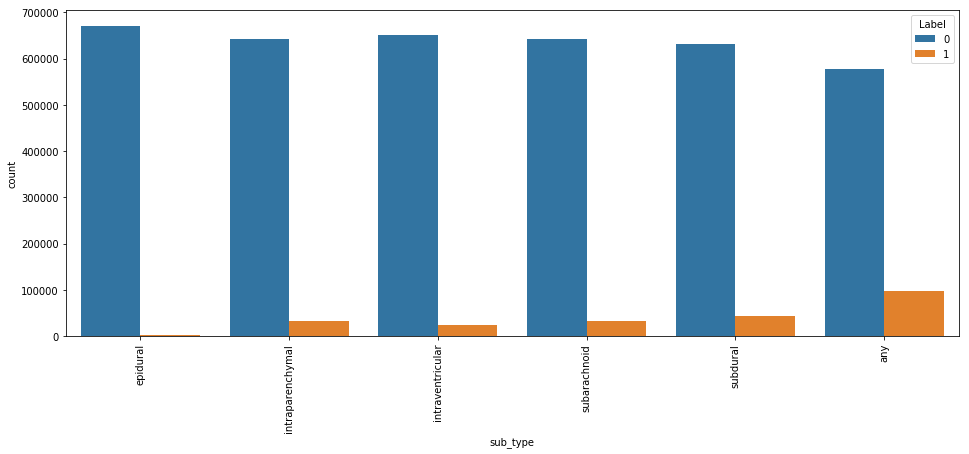

In [21]:
plt.figure(figsize=(16, 6))

graph = sns.countplot(x="sub_type", hue="Label", data=(train_df))
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
plt.show()